### import torch 

In [46]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'2.0.0+cpu'

In [47]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [48]:
from matplotlib import pyplot as plt

In [49]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("../data/")
image_path = data_path / "Euro_MS_Test_red"

### Walkthrough of DIR

In [50]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [51]:
walk_through_dir(image_path)

There are 2 directories and 0 images in '..\data\Euro_MS_Test_red'.
There are 10 directories and 0 images in '..\data\Euro_MS_Test_red\test'.
There are 0 directories and 6 images in '..\data\Euro_MS_Test_red\test\AnnualCrop'.
There are 0 directories and 6 images in '..\data\Euro_MS_Test_red\test\Forest'.
There are 0 directories and 6 images in '..\data\Euro_MS_Test_red\test\HerbaceousVegetation'.
There are 0 directories and 5 images in '..\data\Euro_MS_Test_red\test\Highway'.
There are 0 directories and 5 images in '..\data\Euro_MS_Test_red\test\Industrial'.
There are 0 directories and 4 images in '..\data\Euro_MS_Test_red\test\Pasture'.
There are 0 directories and 5 images in '..\data\Euro_MS_Test_red\test\PermanentCrop'.
There are 0 directories and 6 images in '..\data\Euro_MS_Test_red\test\Residential'.
There are 0 directories and 5 images in '..\data\Euro_MS_Test_red\test\River'.
There are 0 directories and 6 images in '..\data\Euro_MS_Test_red\test\SeaLake'.
There are 10 directori

In [52]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('../data/Euro_MS_Test_red/train'),
 WindowsPath('../data/Euro_MS_Test_red/test'))

In [53]:
import random
import rasterio
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.tif"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image in array format

with rasterio.open(random_image_path) as img:
    # Read the image as a NumPy array
    image_array = img.read()  # By default, reads all bands
    # You can specify a specific band using dataset.read(1) for the first band

# Display basic information about the image
print(f"Image size: {img.width} x {img.height}")
print(f"Number of bands: {img.count}")
print(f"Data type: {img.dtypes[0]}")
print(f"CRS (Coordinate Reference System): {img.crs}")

# Print the NumPy array
print(image_array.shape)
print(image_array[0].shape)

Image size: 64 x 64
Number of bands: 13
Data type: uint16
CRS (Coordinate Reference System): EPSG:32634
(13, 64, 64)
(64, 64)


In [54]:
img_as_array = np.asarray(image_array,dtype=np.float64)
image_array.shape

(13, 64, 64)

In [55]:
def custom_totensor(image):
    tensor = torch.from_numpy(image)
    return tensor

print(custom_totensor(img_as_array))



tensor([[[1244., 1244., 1245.,  ..., 1255., 1255., 1255.],
         [1244., 1244., 1245.,  ..., 1255., 1255., 1255.],
         [1245., 1245., 1245.,  ..., 1256., 1255., 1255.],
         ...,
         [1292., 1292., 1293.,  ..., 1317., 1331., 1346.],
         [1302., 1302., 1303.,  ..., 1315., 1329., 1344.],
         [1314., 1314., 1314.,  ..., 1313., 1327., 1342.]],

        [[ 987.,  987.,  963.,  ...,  982.,  996.,  986.],
         [ 987.,  987.,  963.,  ...,  982.,  996.,  986.],
         [1003., 1003.,  984.,  ..., 1008.,  989.,  985.],
         ...,
         [1038., 1038., 1061.,  ..., 1012., 1015., 1040.],
         [1052., 1052., 1065.,  ..., 1011., 1018., 1026.],
         [1057., 1057., 1063.,  ...,  997., 1018., 1023.]],

        [[ 876.,  876.,  879.,  ...,  900.,  904.,  888.],
         [ 876.,  876.,  879.,  ...,  900.,  904.,  888.],
         [ 898.,  898.,  887.,  ...,  895.,  895.,  882.],
         ...,
         [1047., 1047., 1061.,  ...,  917.,  924.,  957.],
         [

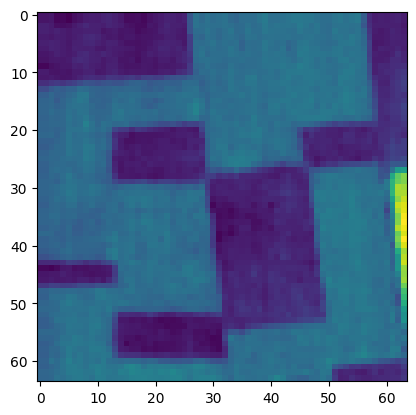

In [56]:
plt.imshow(image_array[2])

In [57]:
# Write transform for image
data_transform = transforms.Compose([
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

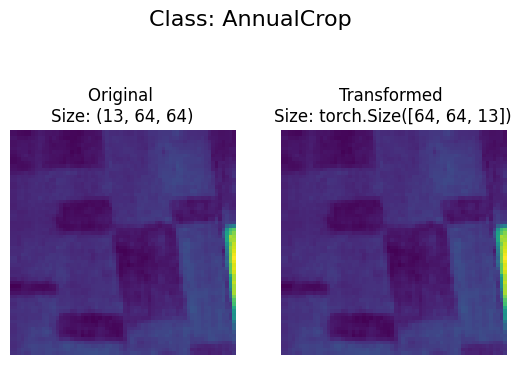

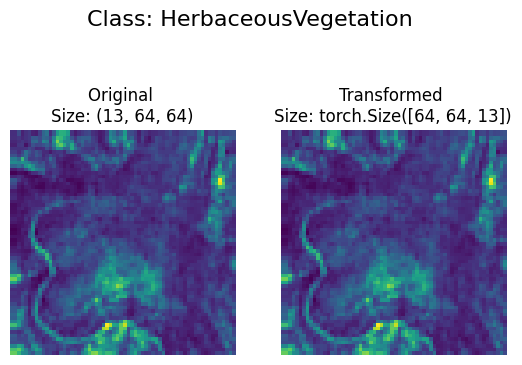

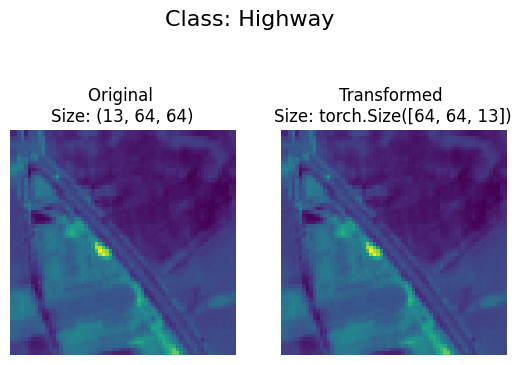

In [58]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with rasterio.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            im_temp = f.read()
            ax[0].imshow(im_temp[3]) 
            ax[0].set_title(f"Original \nSize: {im_temp.shape}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            im_arr = np.asarray(im_temp,dtype=np.float32)
            transformed_image = transform(im_arr)
            transformed_image = transformed_image.permute(2,0,1)
            ax[1].imshow(transformed_image[:,:,3]) 
            ax[1].imshow(im_arr[3])
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [59]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets


In [60]:
class CustomImageFolder(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes, self.class_to_idx = self._find_classes()
        self.samples = self._make_dataset()

    def _find_classes(self):
        classes = [d.name for d in os.scandir(self.root_dir) if d.is_dir()]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

    def _make_dataset(self):
        images = []
        for target_class in sorted(self.class_to_idx.keys()):
            class_index = self.class_to_idx[target_class]
            target_dir = os.path.join(self.root_dir, target_class)
            for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
                for fname in sorted(fnames):
                    path = os.path.join(root, fname)
                    item = (path, class_index)
                    images.append(item)
        return images

    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, index):
        path, target = self.samples[index]
        with rasterio.open(path) as f:
            img_dat = f.read()
            img = np.asarray(img_dat,dtype=np.float32)
        if self.transform is not None:
            img = self.transform(img)
        return img, target

In [61]:
import random


In [62]:
class CustomImageFolder_Size(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes, self.class_to_idx = self._find_classes()
        self.samples = self._make_dataset()

    def _find_classes(self):
        classes = [d.name for d in os.scandir(self.root_dir) if d.is_dir()]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

    def _make_dataset(self):
        images = []
        for target_class in sorted(self.class_to_idx.keys()):
            class_index = self.class_to_idx[target_class]
            target_dir = os.path.join(self.root_dir, target_class)
            for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):     
                for fname in sorted(fnames):
                    path = os.path.join(root, fname)
                    item = (path, class_index)
                    images.append(item)
        return images

    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, index):
        path, target = self.samples[index]
        with rasterio.open(path) as f:
            img_dat = f.read()
            img = np.asarray(img_dat,dtype=np.float32)
        if self.transform is not None:
            img = self.transform(img)
            img = img.permute(1,0,2)                      # to get [height,width,colour_channel as op]
        return img, target
    
    def set_samples(self, num_samples):
        self.samples = self.samples[:num_samples]

In [63]:
# Use ImageFolder to create dataset(s)

# presently testing out a data set for customized size

train_data = CustomImageFolder_Size(root_dir=train_dir, # target folder of images
                                  transform=data_transform,
                                  ) # transforms to perform on data (images)
                        

test_data = CustomImageFolder_Size(root_dir=test_dir, 
                                 transform=data_transform,)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Test data:


In [64]:
"""train_data.set_samples(1000)
test_data.set_samples(200)"""

#doesnt work idk why

'train_data.set_samples(1000)\ntest_data.set_samples(200)'

In [65]:
# Get class names as a list
class_names = train_data.classes
class_names

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [66]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [67]:
# Check the lengths
len(train_data), len(test_data)

(216, 54)

In [68]:
img, label = train_data[9][0], train_data[9][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[1296., 1296., 1296.,  ..., 1333., 1336., 1338.],
         [1296., 1296., 1296.,  ..., 1333., 1336., 1338.],
         [1294., 1294., 1295.,  ..., 1331., 1334., 1337.],
         ...,
         [1245., 1245., 1245.,  ..., 1288., 1285., 1280.],
         [1244., 1244., 1244.,  ..., 1291., 1288., 1283.],
         [1244., 1244., 1244.,  ..., 1293., 1290., 1286.]],

        [[1051., 1051., 1047.,  ..., 1248., 1225., 1232.],
         [1051., 1051., 1047.,  ..., 1248., 1225., 1232.],
         [1057., 1057., 1043.,  ..., 1241., 1256., 1228.],
         ...,
         [ 975.,  975.,  963.,  ..., 1288., 1203., 1070.],
         [ 981.,  981.,  978.,  ..., 1309., 1296., 1174.],
         [ 971.,  971.,  987.,  ..., 1183., 1262., 1276.]],

        [[1080., 1080., 1067.,  ..., 1348., 1313., 1313.],
         [1080., 1080., 1067.,  ..., 1348., 1313., 1313.],
         [1082., 1082., 1074.,  ..., 1380., 1372., 1315.],
         ...,
         [ 868.,  868.,  883.,  ..., 1380., 1260., 1015

Original shape: torch.Size([13, 64, 64]) -> [ [height,color_channels, , width] -> [height, width, color_channels] 
Image permute shape: torch.Size([64, 64, 13]) -> [height, width, color_channels]


Text(0.5, 1.0, 'AnnualCrop')

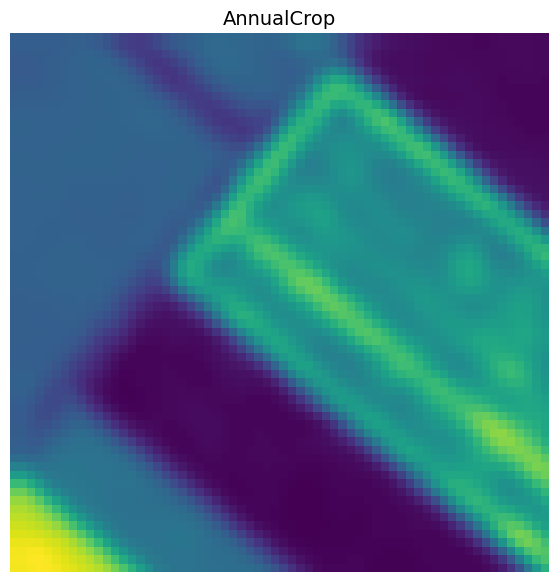

In [69]:
# Rearrange the order of dimensions

img_permute = img.permute(2,1,0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [ [height,color_channels, , width] -> [height, width, color_channels] ")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute[:,:,4])
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [70]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              #num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             #num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x17445ec1270>,
 <torch.utils.data.dataloader.DataLoader at 0x174487e9150>)

In [71]:
'''# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)'''

'# 1. Take in a Dataset as well as a list of class names\ndef display_random_images(dataset: torch.utils.data.dataset.Dataset,\n                          classes: List[str] = None,\n                          n: int = 10,\n                          display_shape: bool = True,\n                          seed: int = None):\n    \n    # 2. Adjust display if n too high\n    if n > 10:\n        n = 10\n        display_shape = False\n        print(f"For display purposes, n shouldn\'t be larger than 10, setting to 10 and removing shape display.")\n    \n    # 3. Set random seed\n    if seed:\n        random.seed(seed)\n\n    # 4. Get random sample indexes\n    random_samples_idx = random.sample(range(len(dataset)), k=n)\n\n    # 5. Setup plot\n    plt.figure(figsize=(16, 8))\n\n    # 6. Loop through samples and display random samples \n    for i, targ_sample in enumerate(random_samples_idx):\n        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]\n\n        # 7. Adju

In [72]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 13, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## Tiny VGG

In [73]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=13, # number of color channels (3 for RGB) 
                  hidden_units=20, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(13, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=10, bias=True)
  )
)

In [74]:

# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 13, 64, 64])

Output logits:
tensor([[ 12.7129, -31.4623,   1.8756,   4.1760,  17.3178, -18.5360,  -0.1992,
          25.4001, -32.6747,  42.7262]])

Output prediction probabilities:
tensor([[9.2339e-14, 6.0307e-33, 1.8148e-18, 1.8109e-17, 9.2321e-12, 2.4783e-27,
         2.2790e-19, 2.9881e-08, 1.7939e-33, 1.0000e+00]])

Output prediction label:
tensor([9])

Actual label:
4


In [75]:
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 13, 64, 64]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 20, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 20, 64, 64]           2,360
│    └─ReLU: 2-2                         [1, 20, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 20, 64, 64]           3,620
│    └─ReLU: 2-4                         [1, 20, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 20, 32, 32]           --
├─Sequential: 1-2                        [1, 20, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 20, 32, 32]           3,620
│    └─ReLU: 2-7                         [1, 20, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 20, 32, 32]           3,620
│    └─ReLU: 2-9                         [1, 20, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 20, 16, 16]           --
├─S

In [76]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [77]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [78]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [79]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 12

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=13, # number of color channels (3 for RGB) 
                  hidden_units=50, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.00001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 11.0826 | train_acc: 0.2130 | test_loss: 5.3015 | test_acc: 0.2222
Epoch: 2 | train_loss: 5.5254 | train_acc: 0.3241 | test_loss: 5.1783 | test_acc: 0.3148
Epoch: 3 | train_loss: 4.0223 | train_acc: 0.4028 | test_loss: 4.8167 | test_acc: 0.4074
Epoch: 4 | train_loss: 3.1002 | train_acc: 0.5093 | test_loss: 3.2707 | test_acc: 0.4815
Epoch: 5 | train_loss: 1.5934 | train_acc: 0.5926 | test_loss: 2.7704 | test_acc: 0.4444
Epoch: 6 | train_loss: 1.2499 | train_acc: 0.6435 | test_loss: 2.6364 | test_acc: 0.4815
Epoch: 7 | train_loss: 0.9274 | train_acc: 0.7176 | test_loss: 2.7218 | test_acc: 0.5741
Epoch: 8 | train_loss: 0.6016 | train_acc: 0.8148 | test_loss: 3.5105 | test_acc: 0.5556
Epoch: 9 | train_loss: 0.4297 | train_acc: 0.8519 | test_loss: 3.2149 | test_acc: 0.5741
Epoch: 10 | train_loss: 0.4284 | train_acc: 0.8611 | test_loss: 3.1458 | test_acc: 0.5556
Epoch: 11 | train_loss: 0.2439 | train_acc: 0.9074 | test_loss: 2.6943 | test_acc: 0.5000
Epoch: 12 | train_

Hmmmm  poor results

In [80]:
def plot_loss_curves(results: [str, list[float]]):

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

In [81]:
# Check the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

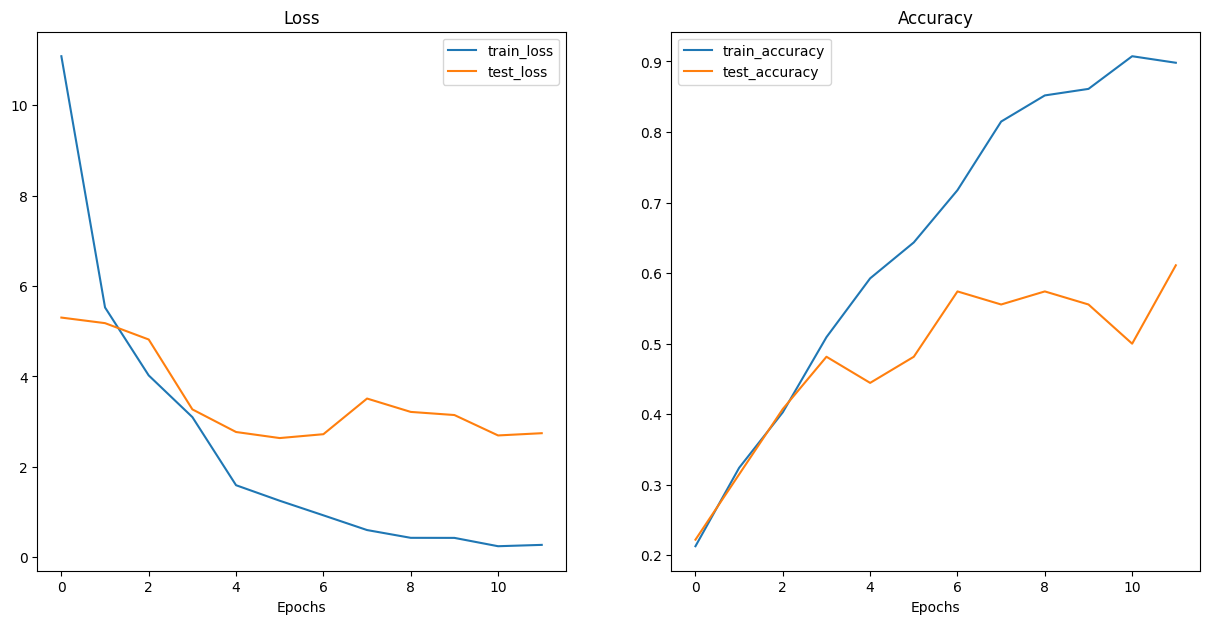

In [82]:
plot_loss_curves(model_0_results)

In [84]:
PATH_SAVE = "../models/EuroSAT_M1_H50_Red001"
torch.save(model_0, PATH_SAVE)

In [85]:
model_l = torch.load(PATH_SAVE)

In [86]:
test_l, test_ac = test_step(model=model_l,
          dataloader = test_dataloader,
          loss_fn = loss_fn)

In [87]:
print( test_l , "   " , test_ac)

2.743877152725549     0.6111111111111112


In [88]:
summary(model_l, input_size=[1, 13, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 50, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 50, 64, 64]           5,900
│    └─ReLU: 2-2                         [1, 50, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 50, 64, 64]           22,550
│    └─ReLU: 2-4                         [1, 50, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 50, 32, 32]           --
├─Sequential: 1-2                        [1, 50, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 50, 32, 32]           22,550
│    └─ReLU: 2-7                         [1, 50, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 50, 32, 32]           22,550
│    └─ReLU: 2-9                         [1, 50, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 50, 16, 16]           --


best one has been H35 models, 
basically hiden channel = e * in channels